In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# read_data

In [2]:
df=pd.read_csv('Breast_Cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df=df.drop('Unnamed: 32',axis=1)

# split data

In [6]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [7]:
df['diagnosis']= [2  if i =='M' else 1  for i in df['diagnosis']]

In [8]:
x=df.iloc[:,2:-1]
y=df.iloc[:,1]

In [9]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [10]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: diagnosis, dtype: int64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

# scalling

In [12]:
scaler=StandardScaler()

In [13]:
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

# 1 Linear-Regression model

In [14]:
lr=LinearRegression()

In [15]:
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
y_pred=lr.predict(x_test)

In [17]:
#acc_lr=accuracy_score(y_pred,y_test)
#recall_lr=recall_score(y_pred,y_test,average='macro')
#precision_lr=precision_score(y_pred,y_test,average='macro')
#f1_lr=f1_score(y_pred,y_test,average='macro')

# 2 polynomial_regression model

In [18]:
poly_reg = PolynomialFeatures(degree =2)

In [19]:
x_poly_train=poly_reg.fit_transform(x_train)

In [20]:
x_poly_val=poly_reg.transform(x_val)

In [21]:
x_poly_test=poly_reg.transform(x_test)

In [22]:
lr2=LinearRegression()

In [23]:
lr2.fit(x_poly_train,y_train)

LinearRegression()

In [24]:
y_pred=lr2.predict(x_poly_test)

In [25]:
#acc_poly=accuracy_score(y_pred,y_test)
#recall_poly=recall_score(y_pred,y_test,average='macro')
#precision_poly=precision_score(y_pred,y_test,average='macro')
#f1_poly=f1_score(y_pred,y_test,average='macro')

# 3 lasso model

In [26]:
ls=Lasso()

In [27]:
param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(
    estimator=ls,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1)
grid.fit(x_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10]}, scoring='accuracy')

In [28]:
grid.best_params_

{'alpha': 0.01}

In [29]:
ls=Lasso(alpha=0.01)

In [30]:
ls.fit(x_train,y_train)

Lasso(alpha=0.01)

In [31]:
y_pred=ls.predict(x_test)

In [32]:
#acc_ls=accuracy_score(y_pred,y_test)
#recall_ls=recall_score(y_pred,y_test,average='macro')
#precision_ls=precision_score(y_pred,y_test,average='macro')
#f1_ls=f1_score(y_pred,y_test,average='macro')

# 4 Ridge model

In [33]:
rd=Ridge()

In [34]:
param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(
    estimator=rd,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1)
grid.fit(x_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10]}, scoring='accuracy')

In [35]:
grid.best_params_

{'alpha': 0.01}

In [54]:
rd=Ridge(alpha=0.01)

In [55]:
rd.fit(x_train,y_train)

Ridge(alpha=0.01)

In [56]:
y_pred=rd.predict(x_test)

In [39]:
#acc_rd=accuracy_score(y_pred,y_test)
#recall_rd=recall_score(y_pred,y_test,average='macro')
#precision_rd=precision_score(y_pred,y_test,average='macro')
#f1_rd=f1_score(y_pred,y_test,average='macro')

# 5 Logistic Regression Model

In [40]:
lg=LogisticRegression()

In [41]:
lg.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred=lg.predict(x_test)

In [43]:
acc_lg=accuracy_score(y_pred,y_test)
acc_lg

0.9824561403508771

In [44]:
recall_lg=recall_score(y_pred,y_test,average='macro')
recall_lg

0.981329839502129

In [45]:
precision_lg=precision_score(y_pred,y_test,average='macro')
precision_lg

0.981329839502129

In [46]:
f1_lg=f1_score(y_pred,y_test,average='macro')
f1_lg

0.981329839502129

# 6 DecisionTree Classifier model

In [47]:
dt=DecisionTreeClassifier()

In [48]:
param_grid = {
  'criterion': ['entropy','gini'],
  'max_depth': [3,4,5,6,7,8,9,10],
}
grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [49]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [50]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth= 5)

In [51]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [57]:
y_pred=dt.predict(x_test)

In [58]:
acc_dt=accuracy_score(y_pred,y_test)
acc_dt

0.9210526315789473

In [59]:
recall_dt=recall_score(y_pred,y_test,average='macro')
recall_dt

0.9176587301587302

In [60]:
precision_dt=precision_score(y_pred,y_test,average='macro')
precision_dt

0.913691451031772

In [61]:
f1_dt=f1_score(y_pred,y_test,average='macro')
f1_dt

0.9155902920608804

[Text(0.5625, 0.9166666666666666, 'concave points_worst <= 0.442\nentropy = 0.947\nsamples = 364\nvalue = [231, 133]\nclass = 2'),
 Text(0.3125, 0.75, 'radius_worst <= 0.134\nentropy = 0.431\nsamples = 249\nvalue = [227, 22]\nclass = 2'),
 Text(0.125, 0.5833333333333334, 'texture_mean <= 0.566\nentropy = 0.13\nsamples = 222\nvalue = [218, 4]\nclass = 2'),
 Text(0.0625, 0.4166666666666667, 'entropy = 0.0\nsamples = 188\nvalue = [188, 0]\nclass = 2'),
 Text(0.1875, 0.4166666666666667, 'radius_worst <= -0.261\nentropy = 0.523\nsamples = 34\nvalue = [30, 4]\nclass = 2'),
 Text(0.125, 0.25, 'entropy = 0.0\nsamples = 24\nvalue = [24, 0]\nclass = 2'),
 Text(0.25, 0.25, 'symmetry_se <= -0.317\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]\nclass = 2'),
 Text(0.1875, 0.08333333333333333, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = 1'),
 Text(0.3125, 0.08333333333333333, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = 2'),
 Text(0.5, 0.5833333333333334, 'texture_mean <= -0.656\ne

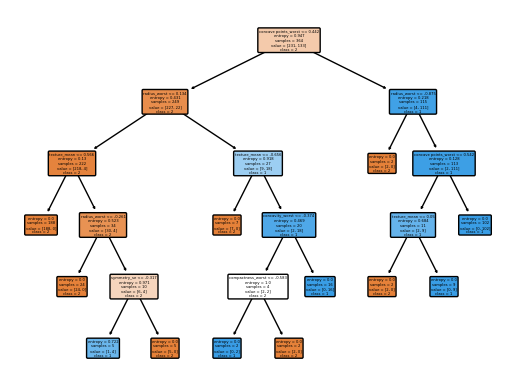

In [91]:
feature_names = [str(i) for i in x]
target_names = df['diagnosis'].unique().astype(str).tolist()
plot_tree(dt, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

# 7 KNeighbors Classifier model

In [63]:
knn=KNeighborsClassifier()

In [64]:
k_no = list(range(1, 15))
param_grid = dict(n_neighbors=k_no)
grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]},
             scoring='accuracy')

In [65]:
grid.best_params_

{'n_neighbors': 7}

In [66]:
knn=KNeighborsClassifier(n_neighbors= 7)

In [67]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [68]:
y_pred=knn.predict(x_test)

In [69]:
acc_knn=accuracy_score(y_pred,y_test)
acc_knn

0.9473684210526315

In [70]:
recall_knn=recall_score(y_pred,y_test,average='macro')
recall_knn

0.9439895185063871

In [71]:
precision_knn=precision_score(y_pred,y_test,average='macro')
precision_knn

0.9439895185063871

In [72]:
f1_knn=f1_score(y_pred,y_test,average='macro')
f1_knn

0.9439895185063871

# 8 SVC model

In [73]:
svc=SVC()

In [74]:
param_grid = {
  'C': [0.1, 1, 10],
  'kernel': ['linear', 'rbf'],
  'gamma': ['scale', 'auto']
}
grid = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [75]:
grid.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [76]:
svc=SVC(C=1,gamma='scale',kernel='linear')

In [77]:
svc.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [79]:
y_pred=dt.predict(x_test)

In [80]:
acc_svc=accuracy_score(y_pred,y_test)
acc_svc

0.9210526315789473

In [81]:
recall_svc=recall_score(y_pred,y_test,average='macro')
recall_svc

0.9176587301587302

In [82]:
precision_svc=precision_score(y_pred,y_test,average='macro')
precision_svc

0.913691451031772

In [83]:
f1_svc=f1_score(y_pred,y_test,average='macro')
f1_svc

0.9155902920608804

# plot all score

In [84]:
models_names=['Logistic Regression','KNN','SVC','TREE']
models_scores=[f1_lg,f1_knn,f1_svc,f1_dt]

<Axes: >

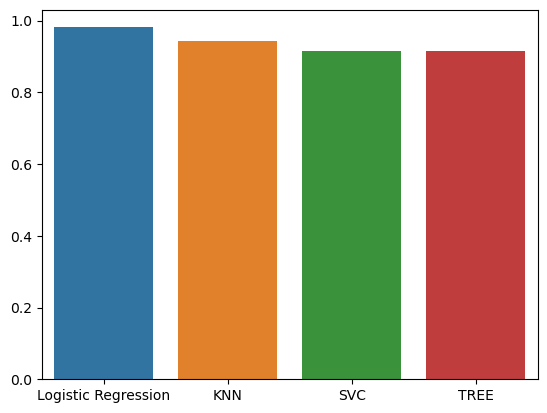

In [85]:
sns.barplot(x=models_names, y=models_scores, data=df)

In [ ]:
# note: cant use linear modal with classification .. so we compare this models only which support classification